In [1]:
import os ,sys
# Add the root directory to sys.path
sys.path.append(os.path.abspath('../scripts'))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import dependant_analysis as dp

In [3]:
merged_data = dp.load_and_merge_data('../data/store.csv','../data/train.csv')
merged_data.shape

2024-09-20 17:21:56,103 - root - INFO - load and merge data
2024-09-20 17:21:56,106 - root - INFO - loadding data
2024-09-20 17:21:57,099 - root - INFO - data loaded sucessfully


(1017209, 19)

## Check how the assortment type affects sales


2024-09-20 17:21:57,314 - root - INFO - Assortment analysis


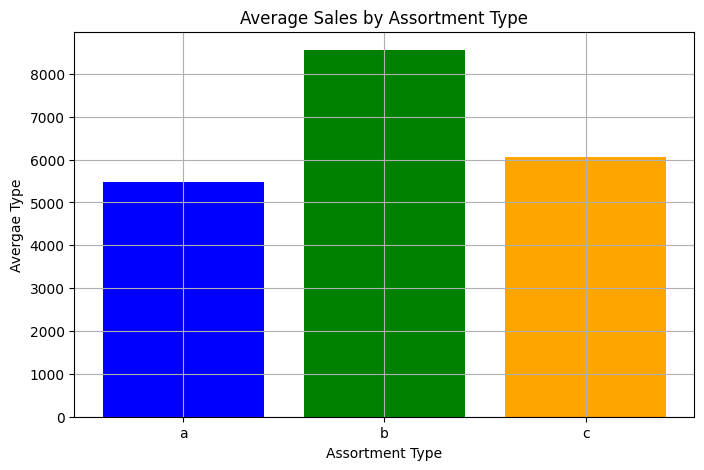

2024-09-20 17:21:57,598 - root - INFO - Assortment sales summary: 
  Assortment        Sales
0          a  5481.026096
1          b  8553.931999
2          c  6058.676567


,Assortment,Sales
0,a,5481.026096
1,b,8553.931999
2,c,6058.676567


In [4]:
dp.assortmnet_analysis(merged_data)

### which the assortment types discriptions are 
- a = basic 
- b = extra
- c = extended

In [5]:
merged_data['Assortment'].value_counts()

Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

#### we can see that the basic assortment type have a great sales even with the list number of store
#### that might be because
- they are not to vast and too small so easy to cover all of the store

## How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?


In [6]:
merged_data.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### there are a missing values

In [7]:
merged_data.isnull().sum()

Unnamed: 0                        0
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

#### since there are 2642 missing datas in the CompetitionDistance i believe that must be there is no compitition so i decided to impute the missing data with a very large number which will indicate there is no nearby store

In [8]:
dp.impote_CompetitionDistance(merged_data).head()

2024-09-20 17:21:57,959 - root - INFO - imputeing the compitition distance with the very big number 100000
2024-09-20 17:21:57,978 - root - INFO - the missing value of CompetitionDistance columns : 0


,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### missing values of computionla distance are imputed sucessfully


2024-09-20 17:21:58,063 - root - INFO - Anlayzing the impact of compitetter distance


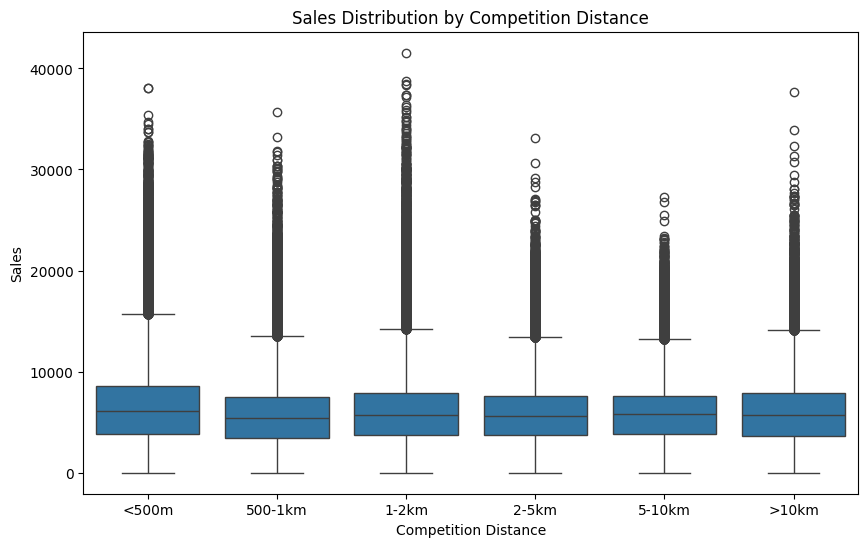

In [9]:
dp.impact_of_compution_distance(merged_data)

2024-09-20 17:21:59,664 - root - INFO - Analyzing the imapact of compitetor distance when the store is in center city


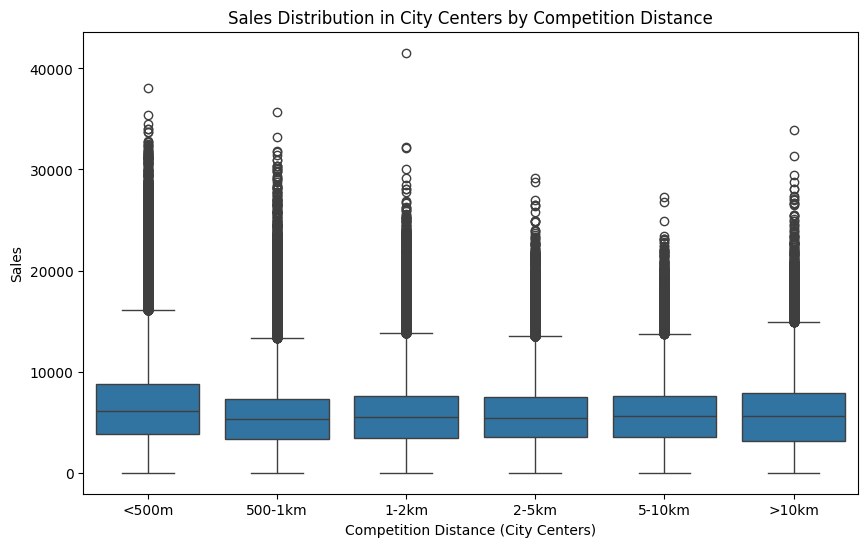

In [10]:
dp.city_center_impact(merged_data)

### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

In [12]:

# dp.effect_of_opening_and_reopening_of_competitors_impact('../data/store.csv','../data/train.csv')